In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
d=pd.read_csv("/content/spam.csv")
d.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
d.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [98]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [99]:
d.isnull().sum()

,0
Category,0
Message,0


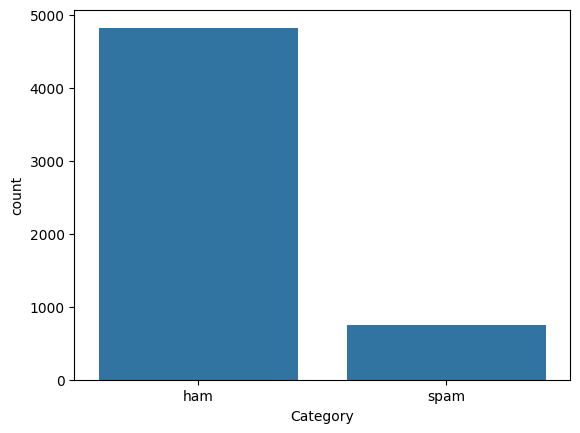

In [100]:
sns.countplot(x=d["Category"],data=d)
plt.show()

In [101]:
d["Category"]=d["Category"].map({"ham":0,"spam":1})
d.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d["Message"],d["Category"],test_size=0.2)

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x_train_count=cv.fit_transform(x_train)
x_test_count=cv.transform(x_test)

In [109]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [110]:
model.score(x_test_count,y_test)

0.979372197309417

In [112]:
y_predicted=model.predict(x_test_count)

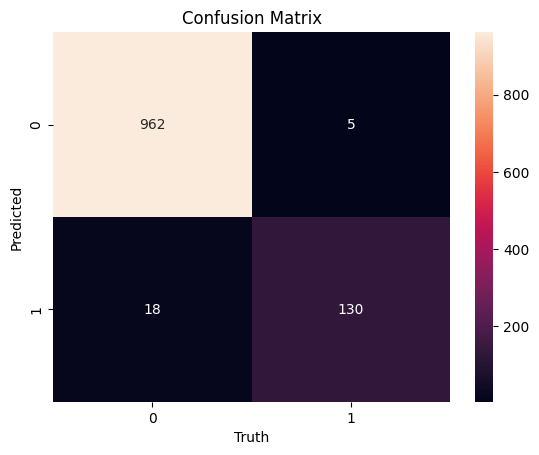

In [119]:
from sklearn.metrics import confusion_matrix as cm
sns.heatmap(cm(y_test,y_predicted),annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Predicted")
plt.xlabel("Truth")
plt.show()

In [120]:
#Better way by using Pipeline to avoid transformation at every step
from sklearn.pipeline import Pipeline
model2=Pipeline([
                 ("vectorizer",CountVectorizer()),
                 ("nb",MultinomialNB())
])
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.979372197309417